<a href="https://www.kaggle.com/code/aicortex/heart-disease-prediction-imbalance-data?scriptVersionId=207402428" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **This notebook is still a work in progress!** 🚧  
> I'll be adding more comments, explanations, and improving the models soon. Stay tuned for updates as I continue enhancing the accuracy and effectiveness of this project! 😄

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

from sklearn.metrics import (
classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
)
import xgboost as xgb
import lightgbm as lgb

In [2]:
df = pd.read_csv('/kaggle/input/heart-disease-prediction-using-logistic-regression/framingham.csv')
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [4]:
seri = df.isna().sum()

df2 = pd.DataFrame(data={
    'Missing Count': seri,
    'Missing Percentage': (seri / len(df)) * 100
})

df2 = df2.sort_values(by='Missing Count', ascending=False)
df2

,Missing Count,Missing Percentage
glucose,388,9.155262
education,105,2.477584
BPMeds,53,1.250590
totChol,50,1.179802
cigsPerDay,29,0.684285
BMI,19,0.448325
heartRate,1,0.023596
male,0,0.000000
age,0,0.000000
currentSmoker,0,0.000000


In [5]:
df = df.drop(['education'], axis=1)

In [6]:
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)
X_train.shape, X_test.shape

((3390, 14), (848, 14))

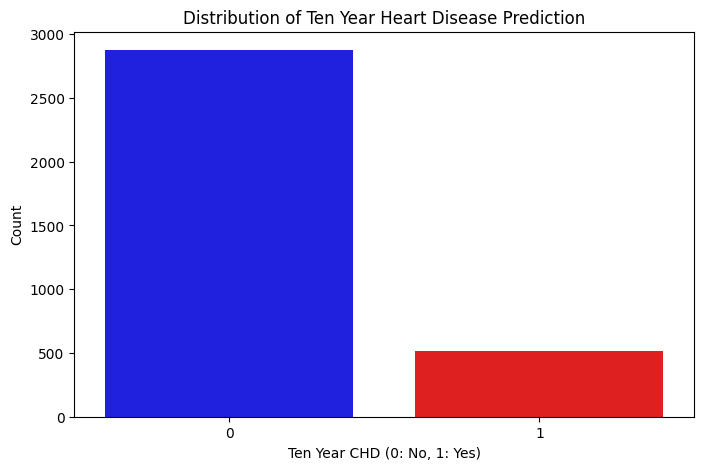

In [7]:
plt.figure(figsize=(8, 5))
sns.countplot(x=y_train, palette=['blue', 'red'])
plt.title("Distribution of Ten Year Heart Disease Prediction")
plt.xlabel("Ten Year CHD (0: No, 1: Yes)")
plt.ylabel("Count")
plt.show()

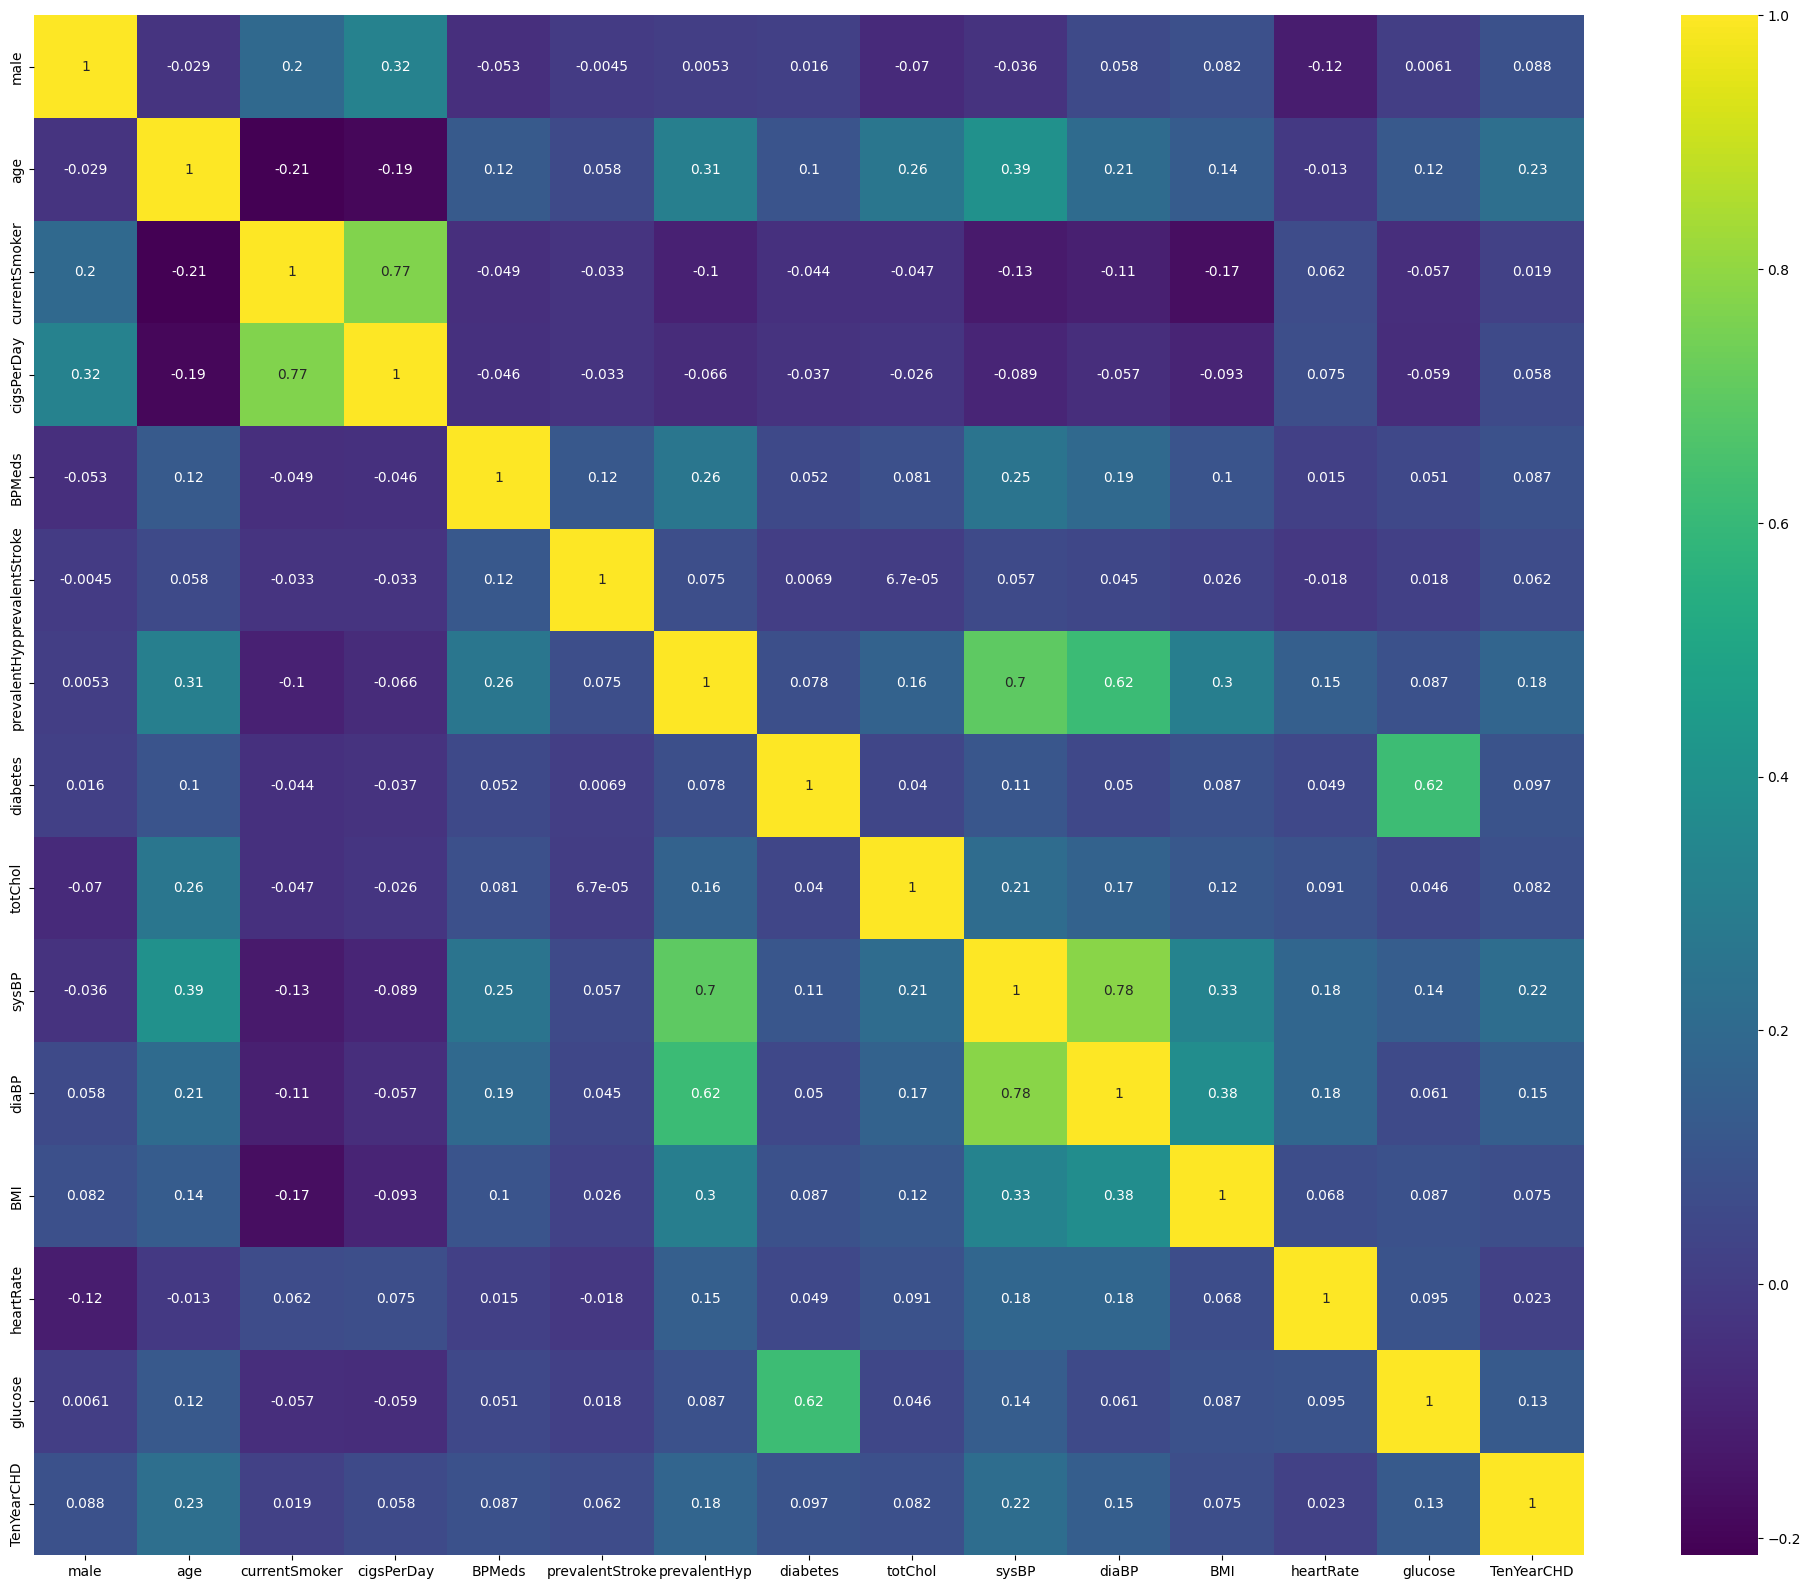

In [8]:
fig , ax = plt.subplots(figsize=(25 , 20))
sns.heatmap(df.corr() ,annot=True , ax=ax , cmap= 'viridis');

In [9]:
numerical_features = ['glucose', 'totChol', 'cigsPerDay', 'BMI', 'heartRate']
categorical_features = ['BPMeds']

numeric_pip = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ("scaler", StandardScaler()),
])

categorical_pip = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

transformer = ColumnTransformer([
    ('num', numeric_pip, numerical_features),
    ('cat', categorical_pip, categorical_features)
])

X_train_processed = transformer.fit_transform(X_train)
X_test_processed = transformer.transform(X_test)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_processed, y_train)


In [10]:
def evaluate(model, X_test=X_test_processed, y_test=y_test):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

In [11]:
model = LogisticRegression()

model.fit(X_train_smote, y_train_smote)

evaluate(model)

              precision    recall  f1-score   support

           0       0.87      0.62      0.72       719
           1       0.18      0.47      0.26       129

    accuracy                           0.59       848
   macro avg       0.52      0.54      0.49       848
weighted avg       0.76      0.59      0.65       848

[[444 275]
 [ 69  60]]


In [12]:
model_2 = DecisionTreeClassifier()

model_2.fit(X_train_smote, y_train_smote)

evaluate(model_2)

              precision    recall  f1-score   support

           0       0.85      0.76      0.80       719
           1       0.17      0.26      0.20       129

    accuracy                           0.69       848
   macro avg       0.51      0.51      0.50       848
weighted avg       0.75      0.69      0.71       848

[[548 171]
 [ 95  34]]


In [13]:
model_3 = RandomForestClassifier()

model_3.fit(X_train_smote, y_train_smote)
evaluate(model_3)

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       719
           1       0.14      0.12      0.13       129

    accuracy                           0.76       848
   macro avg       0.49      0.49      0.49       848
weighted avg       0.74      0.76      0.75       848

[[628  91]
 [114  15]]


In [14]:
xgb_model = xgb.XGBClassifier(random_state=42, scale_pos_weight=1)
xgb_model.fit(X_train_smote, y_train_smote)
evaluate(xgb_model)

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       719
           1       0.17      0.13      0.15       129

    accuracy                           0.77       848
   macro avg       0.51      0.51      0.51       848
weighted avg       0.75      0.77      0.76       848

[[635  84]
 [112  17]]


In [15]:
lgb_model = lgb.LGBMClassifier(random_state=42, scale_pos_weight=1)
lgb_model.fit(X_train_smote, y_train_smote)
evaluate(lgb_model)

[LightGBM] [Info] Number of positive: 2875, number of negative: 2875
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002197 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1320
[LightGBM] [Info] Number of data points in the train set: 5750, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       719
           1       0.26      0.12      0.16       129

    accuracy                           0.82       848
   macro avg       0.56      0.53      0.53       848
weighted avg       0.77      0.82      0.78       848

[[677  42]
 [114  15]]
